In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from bars import bars

from tqdm import tqdm

In [2]:
data = pd.read_csv('test.csv',index_col = 'date_time')
data.index.names = ['timestamp']
data.index = pd.to_datetime(data.index)
data = data.drop(columns=['sell','buy'] )

data.columns=['close','volume']

In [3]:
daily = [g for n, g in data.groupby(pd.Grouper(level='timestamp', freq='D'))]
len(daily)

224

In [5]:
tick = pd.DataFrame(columns=['close']) 
tick.index.names = ['timestamp']

volume = pd.DataFrame(columns=['close']) 
volume.index.names = ['timestamp']

dollar = pd.DataFrame(columns=['close']) 
dollar.index.names = ['timestamp']

th_tick   = 5000
th_volume = 20000
th_dollar = 2000000

for tmp in tqdm(daily[:30]):
    if(tmp.index.size == 0):
        continue
    t_tick,t_volume,t_dollar = bars(tmp,th_tick,th_volume,th_dollar)
    tick = pd.concat([tick, t_tick])
    volume = pd.concat([volume, t_volume])
    dollar = pd.concat([dollar, t_dollar])

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:06<00:00,  7.82s/it]


In [6]:
tick.to_csv('tick_t5K_d30.csv')
volume.to_csv('volume_t20K_d30.csv')
dollar.to_csv('dollar_t2M_d30.csv')

In [14]:
print('size of tick ' + str(tick.index.size))
print('size of volume ' + str(volume.index.size))
print('size of dollar ' + str(dollar.index.size))

size of tick 132
size of volume 205
size of dollar 575


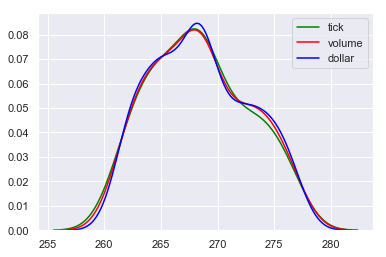

In [13]:
fig, ax = plt.subplots()
sns.kdeplot(tick['close'], color="green", label='tick')
sns.kdeplot(volume['close'],  color="red", label='volume')
sns.kdeplot(dollar['close'], color="blue", label='dollar')
plt.show()

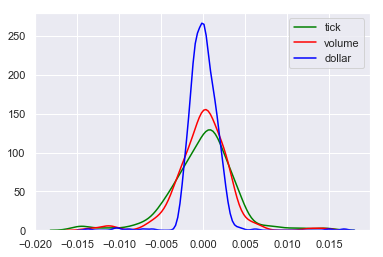

In [12]:
tick['return'] = tick['close'].pct_change()
volume['return'] = volume['close'].pct_change()
dollar['return'] = dollar['close'].pct_change()

tick = tick.dropna()
volume = volume.dropna()
dollar = dollar.dropna()

fig, ax = plt.subplots()
sns.kdeplot(tick['return'], color="green", label='tick')
sns.kdeplot(volume['return'],  color="red", label='volume')
sns.kdeplot(dollar['return'], color="blue", label='dollar')
plt.show()

In [9]:
display(tick['return'].autocorr(lag=1))
display(volume['return'].autocorr(lag=1))
display(dollar['return'].autocorr(lag=1))

-0.044173637335333214

-0.08347302108554866

0.036984768684528824

In [14]:
t_list = []
t_list.append([1,2,3])
t_list

[[1, 2, 3]]

In [67]:
def bar_seq(daily,t,v,d,length=30):
    tick = pd.DataFrame(columns=['close']) 
    tick.index.names = ['timestamp']

    volume = pd.DataFrame(columns=['close']) 
    volume.index.names = ['timestamp']

    dollar = pd.DataFrame(columns=['close']) 
    dollar.index.names = ['timestamp']

    th_tick   = t
    th_volume = v
    th_dollar = d
    
    list_var = []
    for df in daily[:length]:
        if(df.index.size == 0):
            continue
        t_tick,t_volume,t_dollar = bars(df,th_tick,th_volume,th_dollar)
        
        t_tick['return'] = t_tick['close'].pct_change()
        t_volume['return'] = t_volume['close'].pct_change()
        t_dollar['return'] = t_dollar['close'].pct_change()

        '''list_var.append([np.var(t_tick['return']),np.var(t_volume['return']),np.var(t_dollar['return'])])'''
        
        
        tick = pd.concat([tick, t_tick])
        volume = pd.concat([volume, t_volume])
        dollar = pd.concat([dollar, t_dollar])
        
    tick.to_csv('tick_t{}_d{}.csv'.format(th_tick,length))
    volume.to_csv('volume_t{}_d{}.csv'.format(th_volume,length))
    dollar.to_csv('dollar_t{}_d{}.csv'.format(th_dollar,length))
    
    print('size of tick ' + str(tick.index.size))
    print('size of volume ' + str(volume.index.size))
    print('size of dollar ' + str(dollar.index.size))
    
    fig, ax = plt.subplots()
    sns.kdeplot(tick['close'], color="green", label='tick')
    sns.kdeplot(volume['close'],  color="red", label='volume')
    sns.kdeplot(dollar['close'], color="blue", label='dollar')
    plt.show()
    
    tick['return'] = tick['close'].pct_change()
    volume['return'] = volume['close'].pct_change()
    dollar['return'] = dollar['close'].pct_change()

    tick = tick.dropna()
    volume = volume.dropna()
    dollar = dollar.dropna()

    fig, ax = plt.subplots()
    sns.kdeplot(tick['return'], color="green", label='tick')
    sns.kdeplot(volume['return'],  color="red", label='volume')
    sns.kdeplot(dollar['return'], color="blue", label='dollar')
    plt.show()
    
    display(tick['return'].autocorr(lag=1))
    display(volume['return'].autocorr(lag=1))
    display(dollar['return'].autocorr(lag=1))
    
    return list_var

In [68]:
len(daily)

224

C:\Python37\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Python37\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Python37\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



size of tick 1289
size of volume 1309
size of dollar 1360


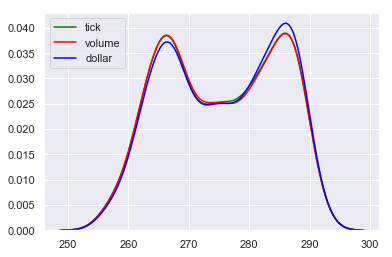

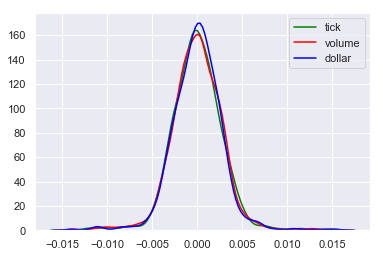

-0.00304071734214072

-0.013122235513838277

-0.032569453922519816

[]

In [69]:
bar_seq(daily,3500,20000,5300000,length=200)

size of tick 696
size of volume 863
size of dollar 2267


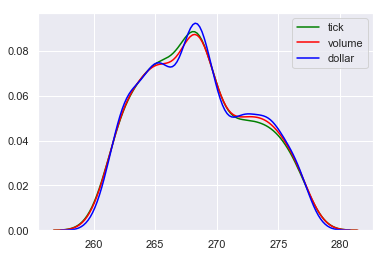

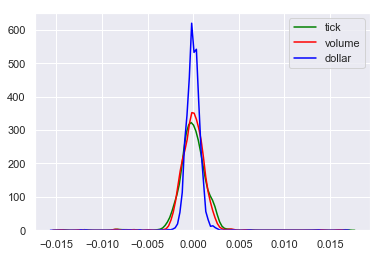

-0.01027964875388183

0.0011095931056040364

-0.024356838352073987

size of tick 343
size of volume 429
size of dollar 1161


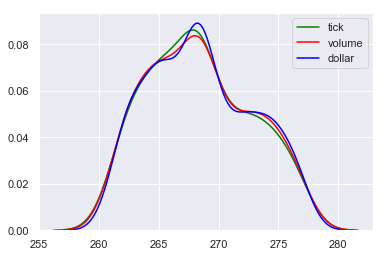

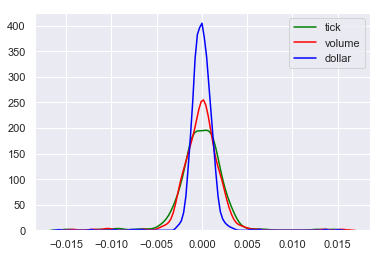

-0.022536373225652252

0.01649227992330171

-0.004524457348495179

size of tick 134
size of volume 207
size of dollar 577


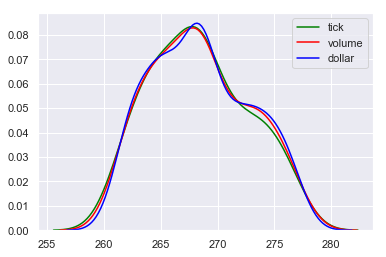

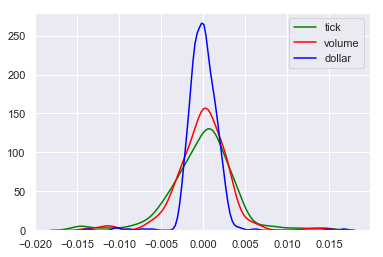

-0.044173637335333214

-0.08347302108554866

0.036984768684528824

size of tick 62
size of volume 98
size of dollar 281


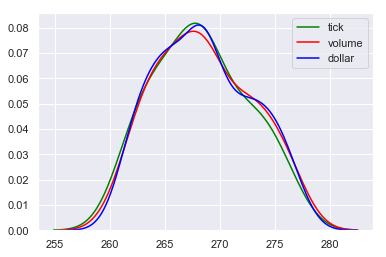

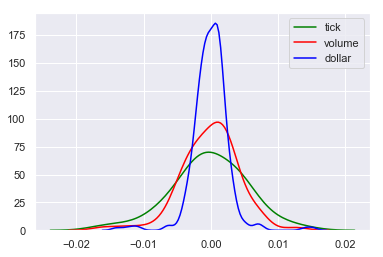

-0.00825397365822813

0.08134559606110517

-0.0278372556447846

size of tick 460
size of volume 63
size of dollar 186


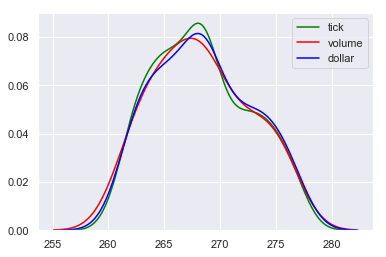

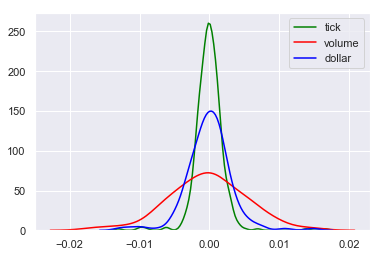

0.01965787186762539

-0.025122110516278797

-0.023834763500034235

In [5]:
for t,v,d in [[1000,5000,500000],[2000,10000,1000000],[5000,20000,2000000],[10000,40000,4000000],[1500,60000,6000000]   ]:
    bar_seq(daily,t,v,d)

type|threshold|size|autocorr
---|---|---|---
tick|1,000|696|-0.01
tick|1,500|430|0.02
tick|2,000|343|-0.02
tick|10,000|134|-0.04
tick|20,000|62|-0.008
volume|5,000|863|0.001
volume|10,000|429|0.02
volume|20,000|207|-0.08
volume|40,000|98|0.08
volume|60,000|63|-0.03
dollar|500,000|2267|-0.02
dollar|1,000,000|1161|-0.005
dollar|2,000,000|577|0.04
dollar|4,000,000|281|-0.03
dollar|6,000,000|186|-0.02

In [42]:
temp_tick = pd.read_csv('tick_t1000_d30.csv',index_col='timestamp')
temp_volume = pd.read_csv('volume_t5000_d30.csv',index_col='timestamp')
temp_dollar = pd.read_csv('dollar_t2000000_d30.csv',index_col='timestamp')

temp_tick['return'] = temp_tick['close'].pct_change()
temp_volume['return'] = temp_volume['close'].pct_change()
temp_dollar['return'] = temp_dollar['close'].pct_change()

temp_tick = temp_tick.dropna()
temp_volume = temp_volume.dropna()
temp_dollar = temp_dollar.dropna()

display(np.std(temp_tick['return']))
display(np.std(temp_volume['return']))
display(np.std(temp_dollar['return']))

0.001740845606012406

0.0015625145525035417

0.0019220475005534766

In [41]:
temp_tick = pd.read_csv('tick_t1000_d30.csv',index_col='timestamp')
temp_volume = pd.read_csv('volume_t5000_d30.csv',index_col='timestamp')
temp_dollar = pd.read_csv('dollar_t2000000_d30.csv',index_col='timestamp')

temp_tick['return'] = temp_tick['close'].pct_change()
temp_volume['return'] = temp_volume['close'].pct_change()
temp_dollar['return'] = temp_dollar['close'].pct_change()

temp_tick = temp_tick.dropna()
temp_volume = temp_volume.dropna()
temp_dollar = temp_dollar.dropna()

'''fig, ax = plt.subplots()
sns.kdeplot(temp_tick['return'], color="green", label='tick')
sns.kdeplot(temp_volume['return'],  color="red", label='volume')
sns.kdeplot(temp_dollar['return'], color="blue", label='dollar')
sns.kdeplot(data['return'], color="black", label='raw')
plt.show()

fig, ax = plt.subplots()
temp_tick['norm'] = (temp_tick['return']-np.mean(temp_tick['return']))/np.std(temp_tick['return'])
temp_volume['norm'] = (temp_volume['return']-np.mean(temp_volume['return']))/np.std(temp_volume['return'])
temp_dollar['norm'] =(temp_dollar['return']-np.mean(temp_dollar['return']))/np.std(temp_dollar['return'])
data['norm'] =(data['return']-np.mean(data['return']))/np.std(data['return'])

sns.kdeplot(temp_tick['norm'], color="green", label='tick')
sns.kdeplot(temp_volume['norm'],  color="red", label='volume')
sns.kdeplot(temp_dollar['norm'], color="blue", label='dollar')
sns.kdeplot(data['norm'], color="black", label='data')
plt.show()'''

display(temp_tick['return'].autocorr(lag=1))
display(temp_volume['return'].autocorr(lag=1))
display(temp_dollar['return'].autocorr(lag=1))

-0.01027964875388183

0.0011095931056040364

0.036984768684528824

In [34]:
from scipy.stats import jarque_bera


jb_value_tick, _ = jarque_bera(temp_tick['return'])
jb_value_vol, _ = jarque_bera(temp_volume['return'])
jb_value_dollar, _ = jarque_bera(temp_dollar['return'])

jb_test_df = pd.DataFrame(data={'jarque_bera_results' : [jb_value_tick,  
                                                         jb_value_vol,
                                                         jb_value_dollar]
                               },
                          index=['tick', 'vol', 'dollar'])
jb_test_df

,jarque_bera_results
tick,22369.407159
vol,41928.631421
dollar,12760.358808


In [44]:
display(temp_tick.index.size)
display(temp_volume.index.size)
display(temp_dollar.index.size)

temp_tick = pd.read_csv('tick_t3500_d30.csv',index_col='timestamp')
temp_volume = pd.read_csv('volume_t20000_d30.csv',index_col='timestamp')
temp_dollar = pd.read_csv('dollar_t5300000_d30.csv',index_col='timestamp')

temp_tick['return'] = temp_tick['close'].pct_change()
temp_volume['return'] = temp_volume['close'].pct_change()
temp_dollar['return'] = temp_dollar['close'].pct_change()

temp_tick = temp_tick.dropna()
temp_volume = temp_volume.dropna()
temp_dollar = temp_dollar.dropna()

display(np.std(temp_tick['return']))
display(np.std(temp_volume['return']))
display(np.std(temp_dollar['return']))

1495

1526

1585

0.002731362985818454

0.002676956326507148

0.002670536372875379

size of tick 192
size of volume 207
size of dollar 211


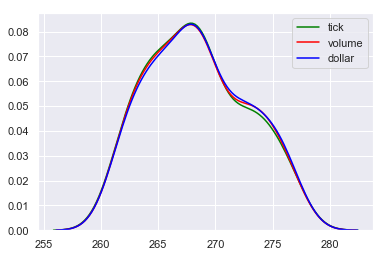

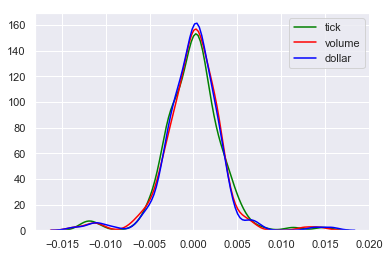

-0.012984681968585701

-0.08347302108554866

-0.11257913902427771

In [7]:
 bar_seq(daily,3500,20000,5300000)

0.13530684487337707

variance


C:\Python37\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Python37\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Python37\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



variance
variance
variance
variance
variance
variance
variance
variance
size of tick 1496
size of volume 1527
size of dollar 1586


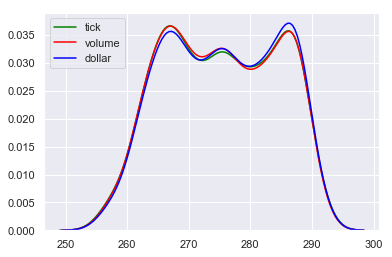

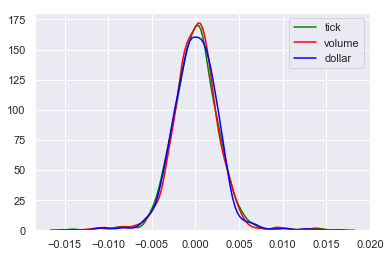

-0.004157872420532011

0.0001526875091056103

-0.004899376928937955

In [26]:
monthly = [g for n, g in data.groupby(pd.Grouper(level='timestamp', freq='M'))]
list_var = bar_seq(monthly,3500,20000,5300000,length=12)

In [30]:
display(list_var)

tick_var=[]
volume_var=[]
dollar_var=[]
for i in list_var:
    tick_var.append(i[0])
    volume_var.append(i[1])
    dollar_var.append(i[2])
    
tick_varvar = np.var(tick_var)
volume_varvar = np.var(volume_var)
dollar_varvar= np.var(dollar_var)

display(tick_varvar)
display(volume_varvar)
display(dollar_varvar)

[[8.104825352395243e-06, 6.109450767545803e-06, 6.711668602123539e-06],
 [9.871254328271289e-06, 1.0040492385521104e-05, 1.055165194931652e-05],
 [6.284438967754881e-06, 6.570345407339116e-06, 6.101340779508397e-06],
 [6.185833778688405e-06, 5.720799653468178e-06, 4.985283621103247e-06],
 [7.653480310986125e-06, 7.414514210434003e-06, 7.719949513905903e-06],
 [5.003557023965887e-06, 4.242073271549313e-06, 4.414483401157231e-06],
 [7.68002319605474e-06, 7.860018571124206e-06, 7.819664965535925e-06],
 [6.344910373501795e-06, 5.602726322006085e-06, 5.616807857099982e-06],
 [1.0101968262744611e-05, 6.7801771655493584e-06, 7.928329891342995e-06]]

2.619762526439006e-12

2.3990126246512785e-12

3.118552672498244e-12

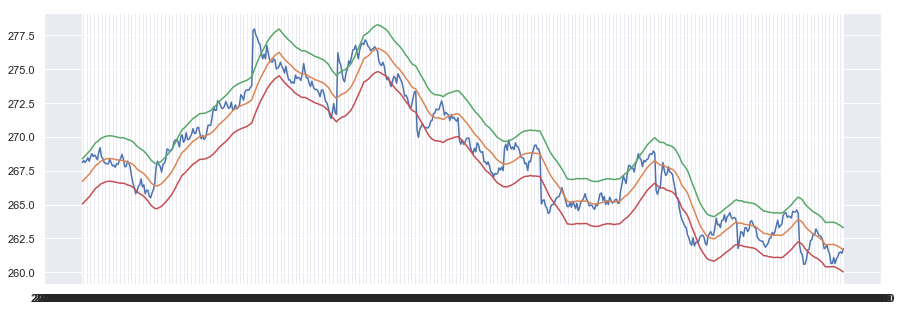

In [59]:
temp_dollar = pd.read_csv('dollar_t2000000_d30.csv',index_col='timestamp')

n = 20
ma = temp_dollar.close.rolling(n).mean()
price_pct = 0.00625

upper_band = ma + ma*price_pct
lower_band = ma - ma*price_pct
bb = pd.concat([temp_dollar.close, ma, upper_band, lower_band], axis=1).dropna()
bb.columns=['close','ma','upper_band','lower_band']

fig, ax = plt.subplots()
plt.plot(bb)
fig.set_figwidth(15)
fig.set_figheight(5)
plt.show()

In [60]:
cross_count=0
for i in range(0, len(temp_dollar['close'])):
    if temp_dollar['close'][i] - upper_band[i] >= 0 and temp_dollar['close'][i-1] - upper_band[i-1] < 0:
        cross_count += 1
    if temp_dollar['close'][i] - lower_band[i] < 0 and temp_dollar['close'][i-1] - lower_band[i-1] >= 0:
        cross_count += 1
cross_count


26

In [61]:
len(temp_dollar['close'])

577